# Classification basics

Today we will focus on **Classification** problems - which means:
- **supervised** learning (with labeled data)
- with **categorical (also called discrete) data** (as opposed to Regression problems which work on continuous data)

___

# A Classification Problem

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn for Netflix. A churner is a customer who resigned his subscription.

Netflix already has a large database of users with past churners.

We would have what we call our **features X** for many customers, e.g.:
- The subscrition plan
- The number of profiles
- The number of watched movies in the past month
- The average number of watched movies per month in the past year
- The subscription date
- ...

And we would have **labels y**:
- The churn status of the customer, we here have **two classes**: True or False

This is a typical **binary classification** problem.

We would like to use machine learning to solve it efficiently.

## There are many ML classification models - with specificities

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn.

There are various Machine Learning **models**. They all have differences and may output different prediction.

Suppose we visualize all emails as points on a 2D charts : they will all draw different separation boundaries.

<img src="https://cdn-images-1.medium.com/max/2000/1*M6djHnMzmTu4c0CN58Dxpg.png" width="900px" align="center"/>

Let's explore one of the most classical ML classification models: the **logistic Regression**

## Logistic Regression: Prediction

How does the logistic regression works?

Just like a linear regression, it will apply a **parameter $\theta$** to each feature X as a weighted sum (or a scalar product). Those parameters $\theta$ can be seen as the **weights** of each feature $i$:
$$
\theta \cdot X = \sum \theta_i \times x_i
$$

Then the **logistic function** (a.k.a. sigmoid) is applied, such as:
$$
h_{\theta}(x) = \frac{1}{1+exp(-\theta X)}
$$

Just to give an idea, the logisitic function looks like that:
![](logistic_curve.png)

As a consequence, the values of $h(x)$ are between 0 and 1. Even better, it can be interpreted as a probability.

We will then apply a threshold to predict a class $\hat{y}$ (churner or not churner):

$$
\hat{y} = 1 \text{ if } h_{\theta}(x) > 0.5 \text{ (i.e. Churner)}
$$

$$
\hat{y} = 0 \text{ otherwise (i.e. Not churner)}
$$

This allows to predict a class $\hat{y}$ with a given set of features X.

But how to find the right parameters $\theta$ that allow the right prediction?

## Cross entropy loss

How to train a logistic regression?

Meaning, how to find the parameters $\theta$ that give the best prediction?

First, we have to define a **loss** $\mathcal{L}$ to minimize.

The loss is also called error, or cost function depending on the context.

The most usual loss for binary classification is the **binary cross entropy**:

$$
\mathcal{L} = - y\,\log(h_{\theta}(x))\,-\,(1-y)\log (1 - h_{\theta}(x))
$$

Basically, we can split it in 4 extreme cases:
- if y = 0 and $h_{\theta}(x) \simeq 0$ : $\mathcal{L} << 1$
- if y = 0 and $h_{\theta}(x) \simeq 1$ : $\mathcal{L} >> 1$
- if y = 1 and $h_{\theta}(x) \simeq 0$ : $\mathcal{L} >> 1$
- if y = 1 and $h_{\theta}(x) \simeq 1$ : $\mathcal{L} << 1$

![](BCE.jpg)

Thus, minimizing this loss function will ensure a good classification.

In real life, we have not one, but many **samples** (a.k.a. **observations**), meaning our loss will actually be written as:
$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h(x^{(i)}))
$$

Where $(i)$ is just a sample: in our **customer churn example, a sample is just a customer** in our database.

And $m$ is the number of samples, so the number of customers we would have in our database.

## Gradient descent

Finally, we want to find the $\theta$ parameters that minimize our loss:

$$
\displaystyle \min_{\theta} \mathcal{L} = \min_{\theta}-\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h(x^{(i)}))
$$

A visual representation would be to try to go down a valley, the valley being our loss function:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Q0NwocOMQUKV2uOl08bRAZupMfaD8y6V">
</p>

> 📚 **Resources**: We can demonstrate our Cost Function is "a bowl" be proving that the function is **[Convex](https://en.wikipedia.org/wiki/Convex_function)**

> **Quiz**: How would find those optimal parameters $\theta$ that minimize our loss?

We can do it iteratively:

Imagine you are in a mountain with heavy fog around you. How can you try to get to the bottom of the valley?

Just look around you at each step and **go each step in the direction that makes you go down the most**.

Here we can do the same:
- We observe around us which direction makes us go down the most
- We take a step towards this direction
- We update our model with the new updated parameters
- And we iterate 🔄

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1KW7E9OIDoHYTxrsuTso7Vng0Eky_Q7Tg">
</p>

This is called **Gradient Descent**

Mathematically, this just means that we compute the partial derivative of the function for a given $\theta_i$:

$$
\displaystyle \theta_i = \theta_i - \alpha\frac{\partial}{\partial\theta_i}\mathcal{L} = \theta_i - d\theta_i
$$

With:
$$
d\theta_i = \alpha\frac{\partial}{\partial\theta_i}\mathcal{L} = (y - h_{\theta}(x)) x_i
$$

Where $\alpha$ is called the **learning rate**. The learning rate will control the size of the steps.

And thus step by step, we eventually may reach the global minimum of our loss function.

Here is an example of visualization of the evolution of our linear regression iteratively.

![](https://drive.google.com/uc?export=view&id=1_l5TDRJMBhHY-_GNehBD4d27aElKQJq1)

- On the left: our Cost Function and our position based on the chosen parameters (m and b)
- On the right: our data points and our linear regression model with updated parameters (m and b)

As you can see, on the left **at each iteration, we update the model parameters (intercept and slope)**, and this creates a **new line** even more fitted to our data. 

As we iterate on the model parameters, we go down our Cost Function until the **minimum error value**. 

This is **done automatically** when calling the **`fit`** method from scikit-learn! 🎩

**Logistic Regression** is also a classical Machine Learning algorithm.

It is a **must-have** in your toolbox as it is very **effective and simple** to implement.

> 🔦 **Hint**: when approaching a ML problem, you can always start by implementing a simple algorithm to have a first benchmark of performance.

<img src="https://drive.google.com/uc?export=view&id=1D4zZjM11aZCsPWJJIR6JTP_0lMCxqTJH" width="900">

# III. The learning process

This Linear Regression seems magical, we fit the scikit-learn object and automatically we retrieve the **best line** representing our data.

But what is happening under the hood?

## III.1. Intuition

![](https://drive.google.com/uc?export=view&id=1h2TSkkuFBTIw9c8CyKZNCnwnbZLMI0Kf)

We search for the **parameters of the model $\theta$** (here the slope and intersect) that minimize the **error** (also called **Cost Function** and noted $J(\theta)$).

> 🔦 **Hint**: The distances (small bars) are called **residuals**, but in practice we prefer to sum the squares of residuals (so that it's always positive + the larger the distance the larger the error). 
>
> $${RSS=\sum _{i=1}^{n}(h_\theta(x_i})-y_{i})^{2}$$
>
> We call this sum the **[Residual Sum of Squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**

In practical, we define the **Cost Function J as the Mean Squared Error**, which corresponds to the mean of the RSS on the training set (𝑚 is the number of training examples):

$${J(\theta)=\frac{1}{m}\sum _{i=1}^{n}(h_\theta(x_i})-y_{i})^{2}$$


## III.2. Gradient Descent

We have a **Cost Function** (or **error**) that happens to be a bowl (how convenient) and we want to minimize it.

- Mathematically, it means we want to solve the following equation:

$$\displaystyle \min_{\theta_0,\theta_1}\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2$$

- Visually, it means we want to get to the bottom of our bowl:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Q0NwocOMQUKV2uOl08bRAZupMfaD8y6V">
</p>

> 📚 **Resources**: We can demonstrate our Cost Function is "a bowl" be proving that the function is **[Convex](https://en.wikipedia.org/wiki/Convex_function)**

> 🏆 **Quiz**: How do we find those optimal parameters that minimize the Cost Function?

# Multiclass Classification with Logistic Regression

How to deal with multiclass classification?

Example of Iris dataset.

=> One vs All

## Example of Iris classification

`scikit-learn` comes with a few standard (and famous) datasets.

For instance the **Iris** dataset:

This dataset consists of 3 different types of flowers: *Setosa, Versicolour, and Virginica*. This corresponds to the **label** (also called **class**) we aim to predict.

Each row corresponds to one flower observation.

The columns contain the **features** (or characteristics) of the observerd flower: *Sepal Length, Sepal Width, Petal Length and Petal Width*.

<p align="center">
<img src="https://cdn-images-1.medium.com/max/1600/0*7H_gF1KnslexnJ3s" width="500px"/>
</p>

This dataset is really famous and serves as benchmark for various classification algorithms.

Let's load this example dataset and visualize our data.

In [2]:
#  Let's visualize this dataset on a 2-dimension chart using 2 first features
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[:,:2] # We keep only 2 features for visualisation purposes

In [3]:
print("X.shape={}".format(X.shape))
print("y.shape={}".format(y.shape))

X.shape=(150, 2)
y.shape=(150,)


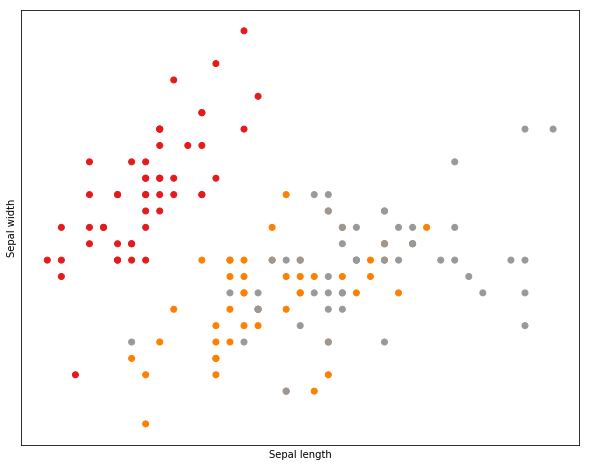

In [5]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(10, 8))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

## II.2. Training a Machine Learning algorithm

In our case of the iris dataset, the task is to predict, given a flower observation (and the characteristics we collected on this flower - sepal lenght, etc.), which kind of flower it is.

We are given samples of each of the 3 possible flowers (Setosa, Versicolour, and Virginica), on which we fit a model to predict the classes to which unseen samples belong.

For now, it is ok to consider our model as a black box.

The machine learning process is done in 3 simple steps:

1. First we instanciate a model using scikit-learn library, for example a `KNeighborsClassifier`.
2. Then we **fit** our model on our training data
3. Finally we retrieve the **prediction** of our trained model on all our data. We will see later that we will want to test our model on **data unseen during training**.

In [6]:
# 1 - We instanciate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # We specify k=3 (number of neighbors)

In [7]:
# 2 - Then we train our model using the `fit` method`
knn.fit(X=X, y=y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
# 3 - Finally we retrieve a prediction on our data using only the features columns
y_pred = knn.predict(X)

We can get a better understanding of our model by plotting the decision boundaries

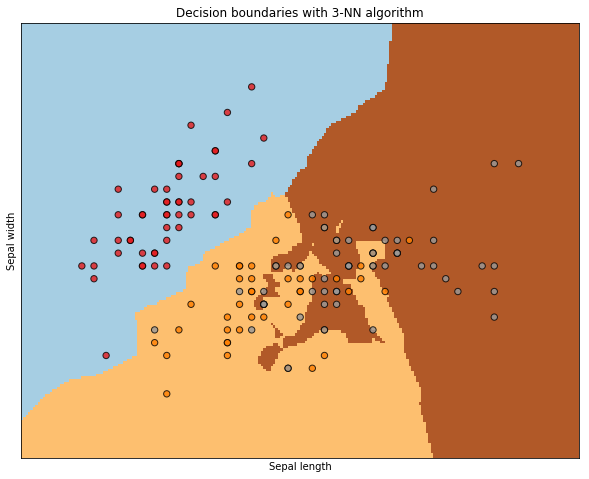

In [10]:
import numpy as np

# Create figure to draw chart
plt.figure(figsize=(10, 8))

# We create a grid of points contained within [x_min, x_max], [y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_knn, cmap=plt.cm.Paired)

# Plot the data points color-coded by their class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, alpha=0.8, edgecolor='k', s=40)
# Format chart
plt.title("Decision boundaries with 3-NN algorithm")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

And finally we can evaluate our model by computing the score (accuracy) of our model. It corresponds to the **percentage of good predictions** (we compare y_pred with y).

In [11]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

print("Model has an accuracy of {}%".format(round(acc*100), 2))

Model has an accuracy of 85.0%


## II.3. Let's solve it with another algorithm: Logistic Regression

Again, we instanciate a `LogisticRegression` model

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Then we fit the model to our data

In [13]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Finally we can retrieve predictions based on our model

In [14]:
y_pred = lr.predict(X)

We can get a better understanding of our model by plotting the decision boundaries

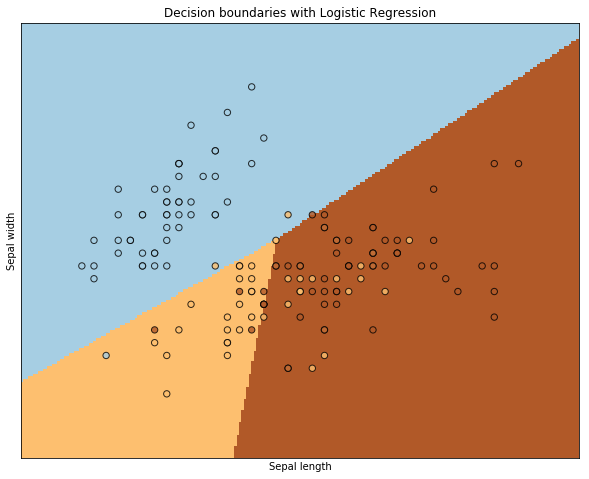

In [15]:
import numpy as np

# Create figure to draw chart
plt.figure(figsize=(10, 8))

# We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_lr, cmap=plt.cm.Paired)

# And plot the testing point in white
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)


# Format chart
plt.title("Decision boundaries with Logistic Regression")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

And finally we can evaluate the global **accuracy** of our model by computing the **score** (number of good predictions over total number of predictions).

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

print("Model has an accuracy of {}%".format(round(acc*100), 2))

Model has an accuracy of 77.0%


___

# III. The learning process

This Linear Regression seems magical, we fit the scikit-learn object and automatically we retrieve the **best line** representing our data.

But what is happening under the hood?

## III.1. Intuition

![](https://drive.google.com/uc?export=view&id=1h2TSkkuFBTIw9c8CyKZNCnwnbZLMI0Kf)

We search for the **parameters of the model $\theta$** (here the slope and intersect) that minimize the **error** (also called **Cost Function** and noted $J(\theta)$).

> 🔦 **Hint**: The distances (small bars) are called **residuals**, but in practice we prefer to sum the squares of residuals (so that it's always positive + the larger the distance the larger the error). 
>
> $${RSS=\sum _{i=1}^{n}(h_\theta(x_i})-y_{i})^{2}$$
>
> We call this sum the **[Residual Sum of Squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**

In practical, we define the **Cost Function J as the Mean Squared Error**, which corresponds to the mean of the RSS on the training set (𝑚 is the number of training examples):

$${J(\theta)=\frac{1}{m}\sum _{i=1}^{n}(h_\theta(x_i})-y_{i})^{2}$$
